# Duplicate rows

In [2]:
import pandas as pd
import numpy as np
# Let's make a toy df 
df = pd.DataFrame({'Name': ['Carlo', 'Carlo', 'Cosimo', 'Carlo', 'Cosimo','Carlo','Cosimo'],
                   'IQ': [np.nan,135 , 132, 135, 138, 131, 130],
                   'Sympathy': [10, 8, 9, 8, 9, 9, 9]})
df

,Name,IQ,Sympathy
0,Carlo,NaN,10
1,Carlo,135.0,8
2,Cosimo,132.0,9
3,Carlo,135.0,8
4,Cosimo,138.0,9
5,Carlo,131.0,9
6,Cosimo,130.0,9


In [3]:
#eliminate exactly duplicate rows in pandas is quite easy

from pandas import DataFrame
df_no_duplicates=DataFrame.drop_duplicates(df)

df_no_duplicates
# Note that it disappeared the index 3! ;)


,Name,IQ,Sympathy
0,Carlo,NaN,10
1,Carlo,135.0,8
2,Cosimo,132.0,9
4,Cosimo,138.0,9
5,Carlo,131.0,9
6,Cosimo,130.0,9


In [5]:
# However this method will eliminate two exactly duplicate rows.
# Sometimes in our dataset we have multiple observation for the same ID.
# How can we do? Best way is to perform a group by operation

#Groupby one column and return the mean of the remaining columns in each group.

df.groupby('Name').mean()

,IQ,Sympathy
Name,,
Carlo,133.666667,8.75
Cosimo,133.333333,9.00


In [6]:
# We can groupby using two columns and return the mean of the remaining column.

# Declare a list that is to be converted into a column 
Surname = ['Santana', 'Ceriotti', 'Curiale', 'Ceriotti', 'Il Vecchio', 'Santana', 'Curiale'] 
  
# Using 'Address' as the column name 
# and equating it to the list 
df['Surname'] = Surname 

df

,Name,IQ,Sympathy,Surname
0,Carlo,NaN,10,Santana
1,Carlo,135.0,8,Ceriotti
2,Cosimo,132.0,9,Curiale
3,Carlo,135.0,8,Ceriotti
4,Cosimo,138.0,9,Il Vecchio
5,Carlo,131.0,9,Santana
6,Cosimo,130.0,9,Curiale


In [7]:
df.groupby(['Name', 'Surname']).mean()

IQ  Sympathy
Name   Surname                    
Carlo  Ceriotti    135.0       8.0
       Santana     131.0       9.5
Cosimo Curiale     131.0       9.0
       Il Vecchio  138.0       9.0

# Outlier Detection

### Boxplot

In [8]:
# lets make a boxplot with seaborn
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])
#ax = sns.boxplot(x=tips["tip"])

URLError: <urlopen error [Errno 11002] getaddrinfo failed>

In [ ]:
# Let's extract the outliers.
# Use the formula Luke, use the formula!
Q1 = tips["total_bill"].quantile(0.25)
Q3 = tips["total_bill"].quantile(0.75)
IQR = Q3 - Q1

# first quartile, third quartile, Interquartile range
print((Q1,Q3,IQR))
# Whiskers extremes
print((Q1 - 1.5 * IQR,Q3 + 1.5 * IQR) )

# Vector of 1 and 0 of the outliers
outl=((tips["total_bill"] < (Q1 - 1.5 * IQR) )| (tips["total_bill"] > (Q3 + 1.5 * IQR)))

#outliers founded
tips["total_bill"][outl]



In [10]:
# Since we want to remove the outliers

inl=((tips["total_bill"] > (Q1 - 1.5 * IQR) ) & (tips["total_bill"] < (Q3 + 1.5 * IQR)))

tips_no_outliers=tips[inl]

tips_no_outliers

NameError: name 'tips' is not defined

In [ ]:
#####HOME WORK!
# Can you do a loop that extract the outliers with the method before for all the numerical
# variables in the dataset airquality?


Obviously you can use the box plot also in subset of your dataframe

In [ ]:
# seaborn gives us the possibility of using the x value to subset the dataframe on that value
# We will use the day of the week to subset the dataframe
ax = sns.boxplot(x="day", y="total_bill", data=tips)


In [ ]:
#####HOME WORK!
# Can you do a loop that extract the outliers for each day of the weak?


### Distribution plotting

In [9]:
sns.distplot(tips["total_bill"]);


NameError: name 'tips' is not defined

# Unsupervised ML algorythms 
### Local Outlier Factor

In the next cell we will generate a dataset with clear outliers.
We will then use it to test our outlier detection algorythms.


15


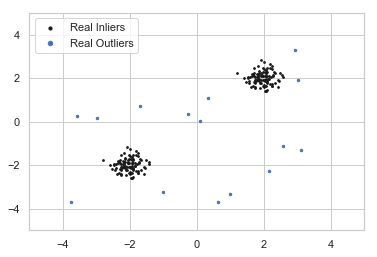

In [11]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

# Generate the inliers
# Will be composed of 2 clusters 
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

#Generate some outliers, uniformly distributed, but distant from the inliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
true_out=np.logical_and(np.linalg.norm(X_outliers-[2,2],axis=1)>1, np.linalg.norm(X_outliers-[-2, -2],axis=1)>1)
X_outliers=X_outliers[true_out]
print(len(X_outliers))

#Lets plot them!
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], color='k', s=3., label='Real Inliers')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='b', s=6., label='Real Outliers')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [12]:
# We normally DO NOT KNOW wich are the outliers (otherwise will be easy ;) )
# Lets combine them in X that will be our dataset.
X = np.r_[X_inliers, X_outliers]


# Fit the model for outlier detection (default)
# In the algorythm we have to give an estimation of the contamination 
# We usually do not know also the contamination... 
# So guessing?!? Let's give 0.02?!? Based on experience or guess...
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.02)

# calling fit_predict will predict the outliers and inliers
# inliers will be marked as 1, ouliers as -1
outl_vec = clf.fit_predict(X)
print(outl_vec) # vector where -1 is an outlier

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1]


In [13]:
#We can than obtain the outlier simply subsetting the dataset
found_outl=X[outl_vec==-1]
found_outl

array([[ 3.12004273, -1.29603875],
       [ 0.62624113, -3.71246181],
       [ 2.58080449, -1.11847487],
       [ 0.98312381, -3.31722028],
       [-3.58654623,  0.25083705]])

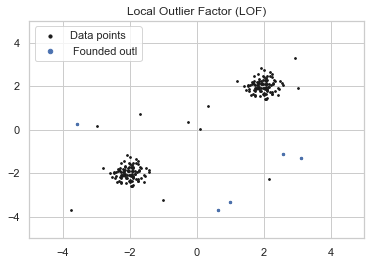

In [14]:
#Let's plot!
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
plt.scatter(found_outl[:, 0], found_outl[:, 1], color='b', s=6., label=' Founded outl')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
#plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]

As you can see by visual inspection, we are missing many outliers.

One way can be to inspect visually the plotted data and change the contamination parameter.
It is a higly inefficient way, and is possible only for low dimension (less or equal to 3)!

How can we do?
The algorithm infer the outliers based on an outlier score calculated for each point.

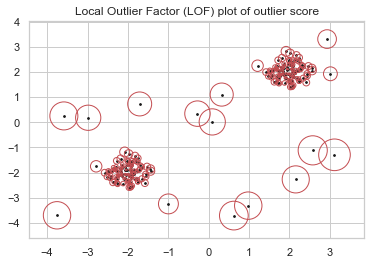

In [15]:
#Let see this score:
X_scores = clf.negative_outlier_factor_


# Plot datapoint and circles with radius proportional to the point outlier scores
plt.title("Local Outlier Factor (LOF) plot of outlier score")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')

It is quite easy to see that real outliers have far more outlier score!
Maybe we can have an insight on the real outliers looking to the outliers score.

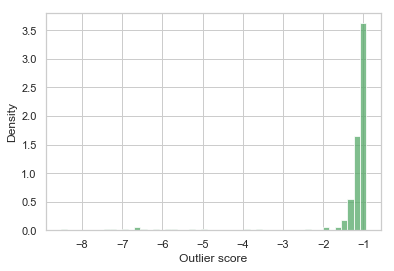

In [16]:
#Let's plot the histogram of X_scores

import numpy as np
import matplotlib.pyplot as plt


# the histogram of the data
n, bins, patches = plt.hist(X_scores, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Outlier score')
plt.ylabel('Density')
plt.title('')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()


It is quite easy to see that the bulk of observation is above -2.
We can decide to set that value to be the threshold for the outliers.

15


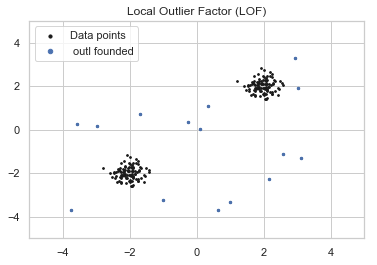

In [17]:
# Let see the predicted outliers:
found_outl=X[X_scores<-2]
print(len(found_outl))
clf.fit_predict

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
plt.scatter(found_outl[:, 0], found_outl[:, 1], color='b', s=6., label=' outl founded')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]

### Recap

Good way of detecting outliers:

- We fit the local outlier factor on the data
- We plot the outlier score
- We see if there is a threshold between inliers and outliers
- Use that for predicting the outliers

# Isolation forest
The procedure before can be applied also with the Isolation forest algorythm.

In [18]:
# Isolation Forest ----
# Isolation forest is randomic, this means that every time you run it you will find 
# different values.

rng = np.random.RandomState(40)

from sklearn.ensemble import IsolationForest

# define the algorythm
clf = IsolationForest(max_samples=100, random_state=rng,behaviour='new',contamination='auto')


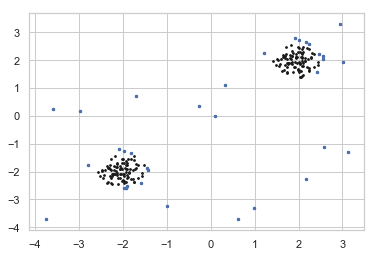

In [19]:
# Isolation forest has also a method for auto detection of the outliers...
# My advice is not to trust it so much.
# Here I will just show you which points are selectd by the the auto-detection. 
# It is a little too aggressive.
clf.fit(X)
sa=clf.predict(X)
def find_out(el):
    if el==-1:
        el=True
    else:
        el=False
    return el

ou=list(map(find_out, sa))
X_outliers=X[ou]

plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='b', s=6., label=' outl')


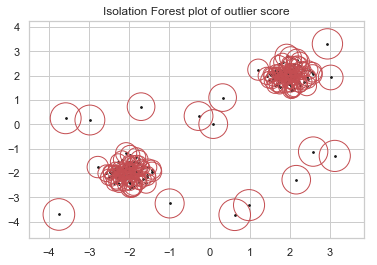

In [21]:
# Also for the IF we can plot the score for each point
X_scores=clf.score_samples(X)

# Plot datapoint and circles with radius proportional to the point outlier scores
plt.title("Isolation Forest plot of outlier score")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')

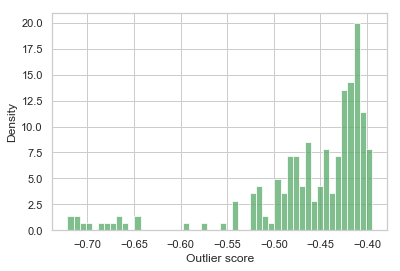

In [22]:
# Let's do as done before with the LOC algorythm

X_scores=clf.score_samples(X)
# the histogram of the data
n, bins, patches = plt.hist(X_scores, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Outlier score')
plt.ylabel('Density')
plt.title('')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()


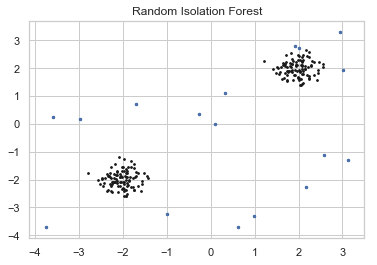

In [24]:
plt.title("Random Isolation Forest")

my_Xou=X[X_scores<-0.55]

plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
plt.scatter(my_Xou[:, 0], my_Xou[:, 1], color='b', s=6., label=' outl')
# plot circles with radius proportional to the outlier scores


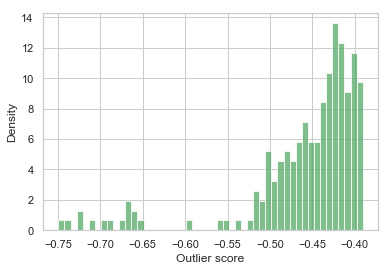

In [25]:
# Just to show, if you run again the algorythm now you will obtain sligthly different 
# results.
clf.fit(X)

X_scores=clf.score_samples(X)
# the histogram of the data
n, bins, patches = plt.hist(X_scores, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Outlier score')
plt.ylabel('Density')
plt.title('')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

Thats why it is important to initialize the random state: reproducibility of your results!
Imagine your boss asking you: show me this incredible results..... can be an epic fail!


# Pipeline

In [26]:
# IMPORTANT if you implement a pipeline with local outlier factor 
# you should:
# FIRST find outliers in training set    
# SECOND eliminate them
# initialize another LOF with the parameter novelty=True
lof = LocalOutlierFactor(novelty=True)
# using the cleaned traning set
lof.fit(df_train_clean)
# predict the outliers in the test set.
lof.predict(df_test)


NameError: name 'df_train_clean' is not defined